In [6]:
# Initialize Otter
import otter
grader = otter.Notebook("cs1090a_hw2.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science
## Homework 2: kNN and Linear Regression

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Pavlos Protopapas, Natesh Pillai, and Chris Gumb

<hr style="height:2.4pt">

In [7]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

<div style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">

### Instructions
- To submit your notebook, follow the instructions given in on the Canvas assignment page.
- Plots should be legible and interpretable *without having to refer to the code that generated them*. They should include labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you believe the plot *means*.
- Autograding tests are mostly to help you debug. The tests are not exhaustive so simply passing all tests may not be sufficient for full credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with very long output. Or better yet, avoid overly long output altogether.
- Feel free to add additional code or markdown cells as needed.
- Don't forget to include a written response when one is requested by a question prompt.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells (note that this can take a few minutes). 
- **You should do a "Restart Kernel and Run All Cells" before submitting to ensure (1) your notebook actually runs and (2) all output is visible**
</div>

In [2]:
# RUN THIS CELL
# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import time

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

In [5]:
# For calculating total notebook runtime
notebook_start = time.time()

<a id="contents"></a>

## Notebook Contents

- [**PART 1 [50 pts]: Predicting the selling price of cars on CarDekho.com**](#part1)
  - [Part 1 Overview](#part1intro)
  - [Question 1: Exploratory data analysis (EDA) [5 pts]](#part1questions)
  - [Question 2: k-Nearest Neighbors [20 pts]](#part2questions)
  - [Question 3: Simple linear regression [25 pts]](#part3questions)


- [**PART 2 [50 pts]: Analysis of Simulated ASEC Data**](#part2)
  - [Part 2 Overview](#part2intro)
  - [Question 4:   Investigating trends [30 pts]](#part4questions)
  - [Question 5:  Calculate the Gini coefficient [10 pts]](#part5questions)
  - [Question 6:  Critiquing the simulated data [10 pts]](#part6questions)


## About this homework

This assignment is the first in which we'll go through the process of loading a dataset, splitting it into train and test sets, performing some preprocessing, and finally fitting some models and evaluating our results.

We have two different datasets:
- [**PART 1**](#part1) car data from [cardekho.com](https://www.cardekho.com/)
- [**PART 2**](#part2) *simulated* income data created from the [Annual Social and Economic (ASEC) Supplement](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.html)

Part 1 explores two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method.

Part 2 is focused EDA and visualization.

<a id="part1"></a>
    
# PART 1 [50 pts]: Predicting the selling price of cars on CarDekho.com

[Return to contents](#contents)

<a id="part1intro"></a>

## Overview

[Return to contents](#contents)

According to its website, **CarDekho.com** is India's leading car search venture. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons, as well as videos and pictures of all car brands and models available in India. Each car has a **current selling price**, which is the price for buying a used car on this site, and an **MRP**, which is the retail price of the car. These two prices differ depending on factors such as brand, make year, mileage, condition, etc.  

### Dataset 

The dataset contains 601 used cars and is available as `data/car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a used car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of the car when it was new (in lakhs). 
- **Kms_Driven** - number of kilometers

**NOTE:** 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

### Objective

Using kNN and linear regression we will predict the `Current_Selling_Price` from the other features available in this dataset.

<a id="part1questions"></a>

## <div class='exercise'><b> Question 1: Exploratory data analysis (EDA) [5 pts]</b></div>

[Return to contents](#contents)

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.1</b></div>

Identify all variables in the dataset. For each variable, state whether you consider it to be quantitative or categorical and briefly justify your choices. 


**Variable Year: Quantitative because you can order these values in a certain way, and this order has meaning. You can also take the mean, or perform any other arithmetic type. The variable is measurable.**
**Variable Current_Selling_Price: Quantitative as it tells us "how much" something is (in this case how much the car is currently selling for). It is a continuous variable. Also a measurable quantity and the ordering has meaning**
**Variable MRP: Quantitative again as it tells us "how much" something is. Continuous and ordering has meaning**
**Variable Kms_Driven: Quantitative as it tells us "how much", ordering has meaning**

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.2</b></div>

The goal in this section is to identify the best feature to use to predict our response, `Current_Selling_Price`. 

- Plot a scatter plot of each feature and our reponse and examine any relationships.
- Which is the predictor that seems to best predict `Current_Selling_Price`? Provide an interpretation of the plots that justifies your choice.


**I believe that MRP is the best predictor to predict current selling price because there is a greater positive correlation amongst these two variables than between any other variable and current selling price.**

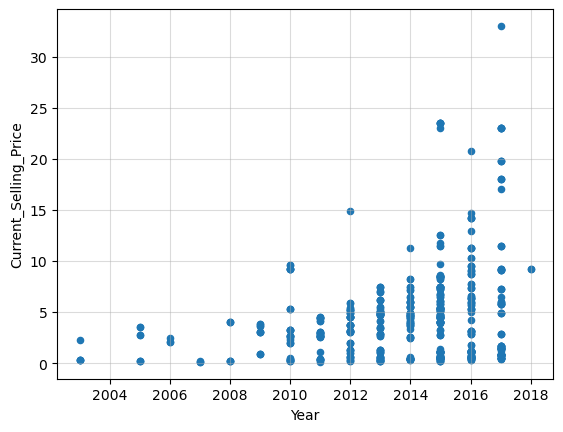

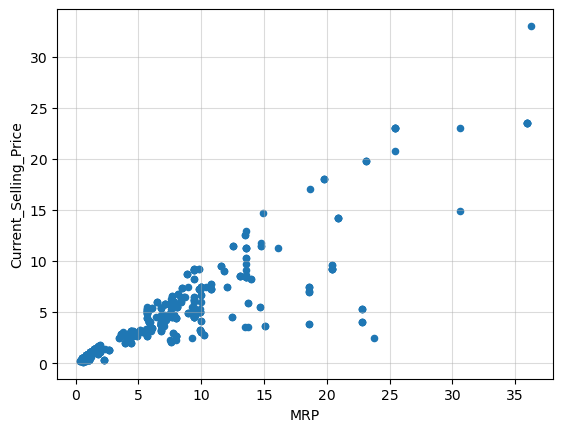

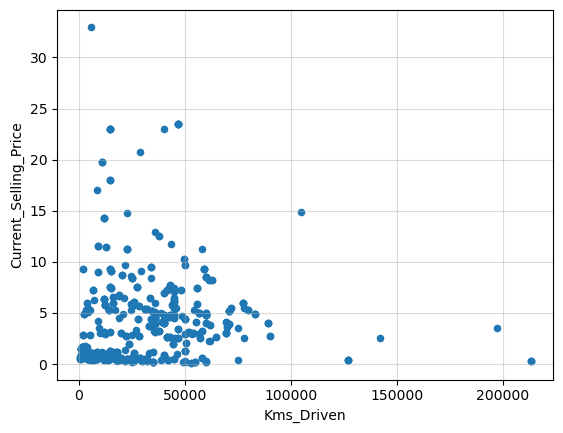

In [3]:
car_data = pd.read_csv('data/car_dekho_full.csv')
car_data.columns
# axes = car_data.ravel()  
# axes

#zipping together the predictor columns (10) with the axes (10), zipping them together creates this iterable of tuples
#pair of column predictor and the axes

for col in car_data.columns:
    #car_data.columns returns a list of the column headers. want to make sure I'm not plotting current selling price against current selling price.
    if col!= 'Current_Selling_Price':
        #Pandas plotting, I only have to set the x and y variables equal to the column headers
        car_data.plot(x= col, y= 'Current_Selling_Price', kind = 'scatter')
        plt.grid(alpha = 0.45)
    
# car_data.plot(x = 'Year', y = 'Current_Selling_Price', kind = 'scatter')

<!-- END QUESTION -->

<a id="part2questions"></a>

## <div class='exercise'><b> Question 2:   k-Nearest Neighbors [20 pts]</b></div>

[Return to contents](#contents)

We will begin our modeling with k-Nearest Neighbors (kNN) regression, using `sklearn` for both preprocessing and model fitting.

<div class='exercise'><b>Q2.1</b></div>

Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`. The resulting splits should be stored in the variables `X_train`, `X_test`, `y_train`, `y_test`.

In [8]:
x = car_data['MRP']
y = car_data['Current_Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 109)

In [9]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<div class='exercise'><b>Q2.2</b></div>

Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2.1</b></div>

For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor `MRP`. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 

In [10]:
y_train = y_train.values.reshape(-1,1)
#-1 takes the value that was in the rows spot, 450, 1 adds 
y_train.shape

(450, 1)

In [11]:
# X_train = X_train.values.reshape(-1,1)
# X_train.shape
# y_train.shape
y_test = y_test.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [12]:
type(X_train)

pandas.core.series.Series

In [13]:
X_train.shape
y_train.shape
X_train = X_train.values.reshape(-1,1)

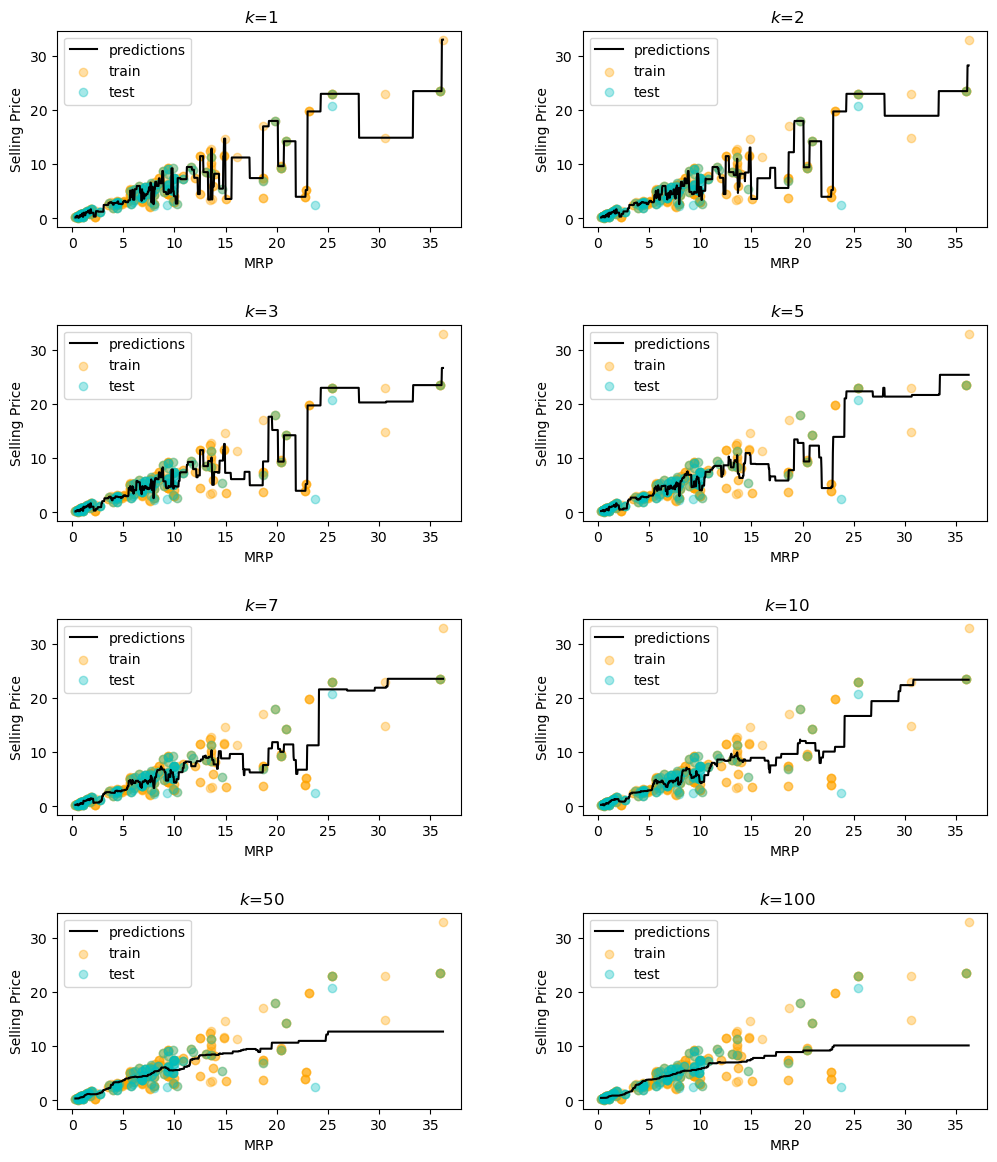

In [14]:
fig = plt.figure(figsize = (12,14))
fig.subplots_adjust(hspace = 0.5, wspace = 0.3)
ks = [1,2,3,5,7,10,50,100]
# lists to store train and test MSEs
# fit a model for each k and record MSEs

# x = car_data['MRP']       
x_lin = np.linspace(x.min(), x.max(), 1000).reshape(-1,1)
# x_lin = pd.DataFrame(x_lin, columns=['MRP'])
# x_lin.head()

# get predictions on these dummy x values to plot (which is the black line) 
plot_num = 1
train_mses = []
test_mses = []
r2_score_list = []

    
for k in ks:
    plt.subplot(4,2,plot_num)
    #setting the k and fitting the model
    train_knn = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    train_mses.append(mean_squared_error(y_train, train_knn.predict(X_train)))
    test_mses.append(mean_squared_error(y_test, train_knn.predict(X_test)))
    r2_score_list.append(r2_score(y_test, train_knn.predict(X_test)))
    y_pred = train_knn.predict(x_lin)
    # plt.plot(x_lin, y_pred)
    plt.plot(x_lin, y_pred, c='k', label='predictions')
    plt.scatter(X_train, y_train, alpha=0.35, c = 'orange', label='train')
    plt.scatter(X_test, y_test, alpha=0.35, c = 'c', label='test')
    plt.xlabel('MRP')
    plt.ylabel('Selling Price')
    plt.title(f' $k$={k}')
    plt.legend();
    plot_num+=1
    
# fit a model for each k and record MSEs

    #setting the k and fitting the model
    #making some predictions on the training data, calculate mse, appending the mean squared error
    

 
    
    
    
#     x_lin = np.linspace(x.min(), x.max(), 1000)
# x_lin = pd.DataFrame(x_lin, columns=['temp'])
# x_lin.head()

# # get predictions on these dummy x values to plot (which is the black line) 
# y_pred = best_knn.predict(x_lin)

# plot!
# plt.plot(x_lin, y_pred)
# plt.scatter(x_train, y_train, alpha=0.45, label='train')
# plt.scatter(x_test, y_test, alpha=0.45, label='test')
# plt.plot(x_lin, y_pred, c='k', label='predictions');
# plt.xlabel('temp')
# plt.ylabel('count')
# plt.title(f'kNN Regression Model\n $k$={best_k}')
# plt.legend();
    #making some predictions on the training data, calculate mse, appending the mean squared error

    

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2.2</b></div>

Plot the training and test $MSE$ values as a function of $k$ (1 plot in total).

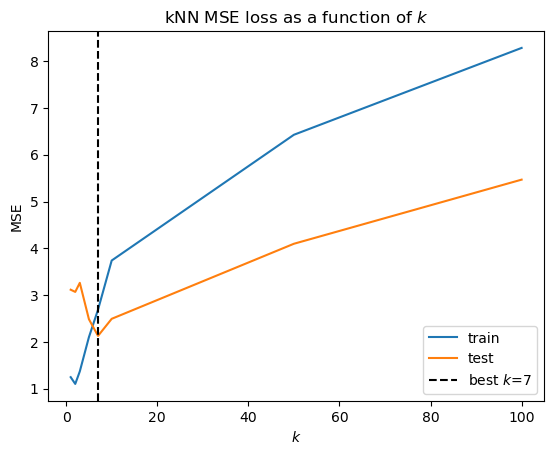

In [15]:
#saving the minimum test MSE index 
best_idx = np.argmin(test_mses)
# which we can use to select the k that corresponds to that minimum loss
best_k = ks[best_idx]
plt.plot(ks, train_mses, label='train')
plt.plot(ks, test_mses, label='test')
plt.axvline(best_k, c='k', ls='--', label=rf'best $k$={best_k}')
plt.xlabel(r'$k$')
plt.ylabel('MSE')
plt.title('kNN MSE loss as a function of $k$')
plt.legend();

<!-- END QUESTION -->

<div class='exercise'><b>Q2.2.3</b></div>

Find the best model based on the test $MSE$ values. Store the best $k$-value in `best_k` and the best test $MSE$ in `best_mse`.

In [16]:
# your code here
best_k = best_k
best_mse = test_mses[4]

In [17]:
print(
    f"The best k value is {best_k}. This corresponds to the "
    f"lowest test MSE of {best_mse:.3f}."
)

The best k value is 7. This corresponds to the lowest test MSE of 2.129.


In [18]:
grader.check("q2.2.3")

q2.2.3 results: All test cases passed!

<div class='exercise'><b>Q2.2.4</b></div>

Evaluate and report the $R^2$ of the best model. Save the $R^2$ of the best model in `best_r2`.

In [19]:
# your code here
best_idx_r2 = np.argmin(r2_score_list)
best_k = ks[best_idx_r2]
best_r2 = r2_score_list[best_idx_r2]
# best_idx_r2
# best_k = ks[best_idx_r2]
# best_r2 = best_idx_r2


In [20]:
print(
    f"The R-squared score evaluated on the test set for the best model "
    f"with k={best_k} is {best_r2:.4f}."
)

The R-squared score evaluated on the test set for the best model with k=100 is 0.6605.


In [21]:
grader.check("q2.2.4")

q2.2.4 results: All test cases passed!

<a id="part3questions"></a>

## <div class='exercise'><b>Question 3:  Simple linear regression [25 pts]</b></div>

[Return to contents](#contents)

<div class='exercise'><b>Q3.1</b></div>

We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables you used in the kNN model. You will also use the same 75% training and 25% testing split of the data, which was created using `random_state = 109`.

<div class='exercise'><b>Q3.1.1</b></div>

Fit a linear regression model. Name your model `linreg`.

In [22]:
# your code here
# Instantiate a LinearRegression class object and fit with train data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [23]:
grader.check("q3.1.1")

q3.1.1 results: All test cases passed!

<div class='exercise'><b>Q3.1.2</b></div>

Report the slope and intercept values for the fitted linear model. Name your variables `slope` and `intercept`.

In [24]:
# your code here
slope_array = linreg.coef_
intercept_array = linreg.intercept_
slope = slope_array.item()
intercept = intercept_array.item()

In [25]:
print(
    f"Intercept of the fitted linear model\t\t{intercept:.4f}\n"
    f"Slope of the fitted linear model\t{slope:.4f}"
)

Intercept of the fitted linear model		0.1124
Slope of the fitted linear model	0.6157


In [26]:
grader.check("q3.1.2")

q3.1.2 results: All test cases passed!

<div class='exercise'><b>Q3.1.3</b></div>

Report the $MSE$ for the training and test sets and the $R^2$ for the test set. Name your variables `lin_train_mse`, `lin_test_mse`, and `lin_test_r2`.

In [27]:
# your code here 
#Compute the MSE of the model
lin_train_mse = mean_squared_error(y_train, linreg.predict(X_train))
lin_test_mse = mean_squared_error(y_test, linreg.predict(X_test))
#Compute the R-squared of the model
lin_test_r2 = r2_score(y_test, linreg.predict(X_test))


    # test_mses.append(mean_squared_error(y_test, train_knn.predict(X_test)))
    # r2_score_list.append(r2_score(y_test, train_knn.predict(X_test)))

In [28]:
print("Linear regression model results:\n")
print(
    "\tTrain MSE\t{:.4f}\n"
    "\tTest MSE\t{:.4f}\n".format(
        lin_train_mse,
        lin_test_mse,
    )
)

print(f"\tTest R-squared\t{lin_test_r2:.4f}")

Linear regression model results:

	Train MSE	4.7133
	Test MSE	3.1362

	Test R-squared	0.8053


In [29]:
grader.check("q3.1.3")

q3.1.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.1.4</b></div>

Create the following 3 plots:
- Plot the **regression line** along with the **training data**.
- Plot the **residuals** of the model on the **training** set as a function of the **predictor** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.
- Plot a the **distribution** of the **residuals** on the **training** set.

As always, your plots should be well-labeled.

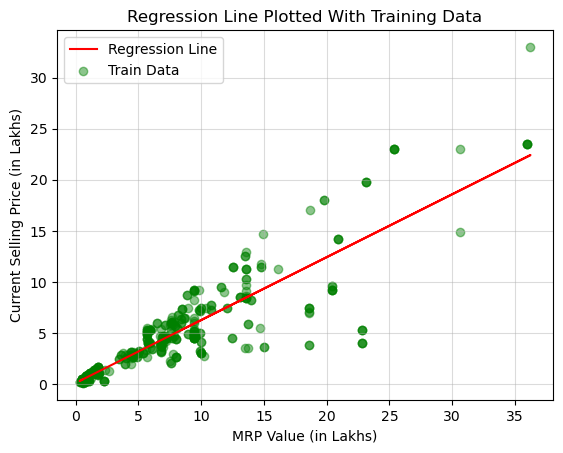

In [30]:
y_pred = linreg.predict(X_train)
plt.plot(X_train,y_pred, label = 'Regression Line', color = 'red')
plt.scatter(X_train, y_train, alpha = 0.45, color = 'green',label = 'Train Data')
plt.legend()
plt.xlabel('MRP Value (in Lakhs)')
plt.ylabel('Current Selling Price (in Lakhs)')
plt.title('Regression Line Plotted With Training Data')
plt.grid(alpha = 0.45)

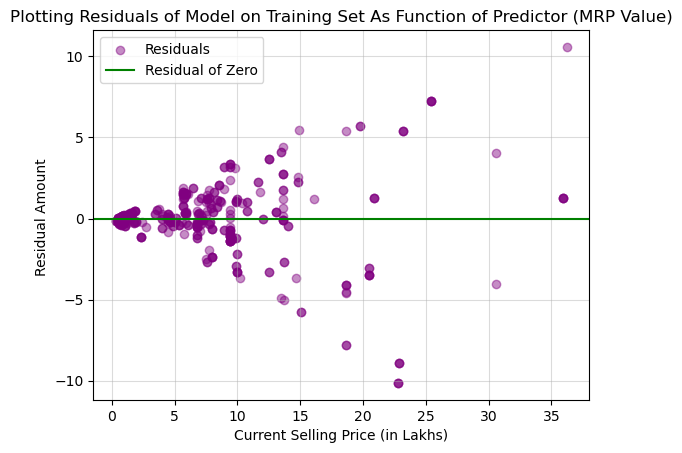

In [31]:
residual = y_train - y_pred #gives me residual array
plt.scatter(X_train, residual, label = 'Residuals', color = 'purple', alpha = 0.45)
plt.axhline(y=0, color = 'green', label = 'Residual of Zero')
plt.xlabel('Current Selling Price (in Lakhs)')
plt.ylabel('Residual Amount ')
plt.title('Plotting Residuals of Model on Training Set As Function of Predictor (MRP Value)')
plt.legend()
plt.grid(alpha=0.45)


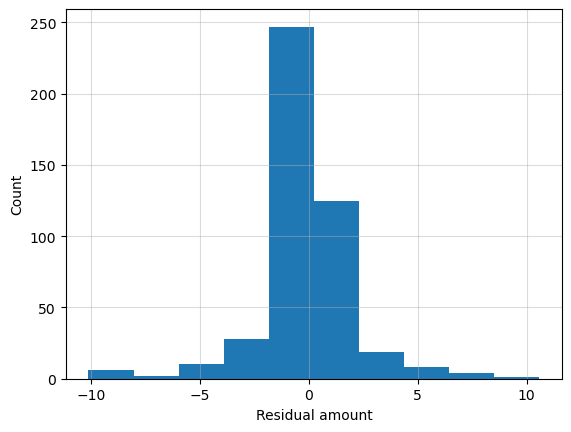

In [32]:
plt.hist(residual, bins = 10)
plt.xlabel("Residual amount")
plt.ylabel("Count")
plt.grid(alpha = 0.45)

<!-- END QUESTION -->

<div class='exercise'><b>Q3.2</b></div>
Answer the following questions about your results:

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2.1</b></div>

A linear regression model makes four important assumptions. For each assumption, describe how one or more of the plots in the previous question may provide evidence that (1) the assumption holds, (2) that the assumption is violated, or (3) that none of the plots have any bearing on the assumption. 

**Note:** Don't over-think this question! You are just being asked to use the plots above to check the four assumptions and to explain your reasoning.

The four assumptions of linear regression are linearity between the response and predictor variables, Homoscedasticity: The variance of residual is the same for any value of X, Independence: Observations are independent of each other, Normality: For any fixed value of X, Y is normally distributed.

The regression line's plot against the training data does not violate the linearity assumption. It is clear that a positive linear relationship between the MRP predictor and the selling price response variable is a reasonable way to fit the data. 

For Homoscedasticity, this assumption is violated with the plot of residuals against the current selling price variable. We can see that there is this less than (<) sign, which suggests that the residuals seem to get larger (and thus the variance) as the current selling price increases. 

For Normality, the residual amount plot suggests that the assumption holds because the residual amounts look normally distributed. Thus, the assumption of normality is not violated in this plot. 

For Independence, we do not have enough data to determine this information based on the plots we created. I mean there is no way to know if the data we sampled is independent. And the plots don't indicate anything on this. There's nothing to say here.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2.2</b></div>

Based on what you have seen in the preceding questions, which model would you select as the best and why? Might you have any reason to doubt your choice? Why or why not?

**Hint:** There were more than just 2 candidate models.

I would probably go with a kNN model with k=7 because while the data on the surface looks very linear, you can see that there is way more variability in selling price for larger MRP values. Therefore, I think there is less reliability in a linear regression model with a positive slope to predict these values because there is likely to be an overestimation. I think a kNN model considers this when estimating where the nearest neighbors are, so there is less likelihood of making an overestimation for the larger MRP values. 

<!-- END QUESTION -->

<a id="part2"></a>
    
# PART 2 [50 pts]: Analysis of 2024 US Annual Social and Economic (ASEC) Supplement

[Return to contents](#contents)

<a id="part2intro"></a>

## Overview

[Return to contents](#contents)

In this part we analyze *simulated* income data from the publically available 2024 US Annual Social and Economic (ASEC) Supplement (https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.html), provided by the US Census Bureau. The Current Population Survey (CPS) has been conducted monthly for over 50 years. Currently, about 54,000 households are interviewed monthly, scientifically selected on the basis of area of residence to represent the nation as a whole, individual states, and other specified areas. 

### Dataset

The simulated data can be found in `data/census_data.csv`.

The number of features have been greatly reduced from the original dataset. You can see the description of the original dataset in the [ASEC data dictionary](https://www2.census.gov/programs-surveys/cps/datasets/2024/march/asec2024_ddl_pub_full.pdf).

In addition to subsetting the features, other preprocessing steps have been taken. For example, some categorical variables have had their number of unique values reduced. 

We refer to the data as *simulated* because sampling was used to turn what was originally an ordinal response variable (42 income brackets) into something more continous.

Considering this, the results of your analysis should be viewed skeptically. You can view the the preprocessing steps taken to create the simplified, simulated data in `data/preprocessing.ipynb`.

**NOTE:** Variables have been renamed for easier interpretation. You can find the original variable names in the preprocessing notebook. It will be these original variable names that appear in the data dictionary linked above.

### Features
- **age** - Age of person 
- **hourly_pay** - Hourly salary of person (-1 if person is not payed by the hour)
- **hours_per_week** - Number of hours usually worked per week
- **weeks_worked** - Number of weeks worked per year

- **sex** - {'Female': 0,'Male': 1} 
- **marital_status** - {'married':0,'widowed':1,'Divorced':2, 'Separated':3,'Never married':4}
- **military_service** - {'has not served in the US armed forces':0,'has served in the US armed forces':1}
- **student_status** - {'Not currently studying':0,'Enrolled full-time':1, 'Enrolled part-time':1}
- **education** - {'Not finished high school': 0, 'High school': 1, 'Associate degree': 2, 'Bachelor\'s': 3, ,'Master\'s': 4,'Professional school degree': 5', Doctorate': 6}

- **race** - {'White': 0, 'Black': 1, 'American Indian, Alaskan Native only (AI)': 2, 'Asian': 3, ,'Hawaiian, Pacific Islander (HP)': 4,'White-Black': 5', 'White-AI': 6, 'White-Asian': 7, 'White-HP': 8, 'Black-AI': 9, 'Black-Asian': 10, 'Black-HP': 11, 'AI-Asian': 12, 'AI-HP': 13, 'Asian-HP': 14, 'other race combinations': 15}

- **industry** - Industry that the person is working in {'Other': 0, 'Agriculture, forestry, fishing, hunting': 1, 'Mining': 2, 'Construction': 3, ,'Manufacturing': 4,'Wholesale and retail trade': 5','Transportation and utilities': 6, 'Information': 7, 'Financial activities': 8, 'Professional and business services': 9, 'Education and health services': 10, 'Leisure and hospitality': 11, 'Other services': 12, 'Public administration': 13, 'Armed Forces': 14}

- **occupation** - Occupation of person {'Other': 0, 'Management, business, and financial occ.': 1, 'Professional and related occ.': 2, 'Service occ.': 3, ,'Sales and related occ.': 4,'Office and administrative support occ.': 5','Farming, fishing and forestry': 6, 'Construction and extraction occ.': 7, 'Installation, maintenance and repair occ.': 8, 'Production occ.': 9, 'Transportation and material moving occ.': 10, 'Armed Forces': 11}


- **income** - Annual income in dollars

<a id="part4questions"></a>

## <div class='exercise'><b>Question 4: Investigating trends [30 pts]</b></div>

[Return to contents](#contents)

Below we'll answer questions about potential trends in the data with the help of plots and/or simple statistics. Your goal should be to communicate your findings clearly. So be sure to provide an interpretation with your visualizations or other output.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.1</b></div>

Is there a disparity in income of participants by gender? Consider using a log scale or another technique when plotting to communicate findings more clearly.

**Yes there is an income disparity by gender. We can see that the average male earns more (about $20,000) than the average female**

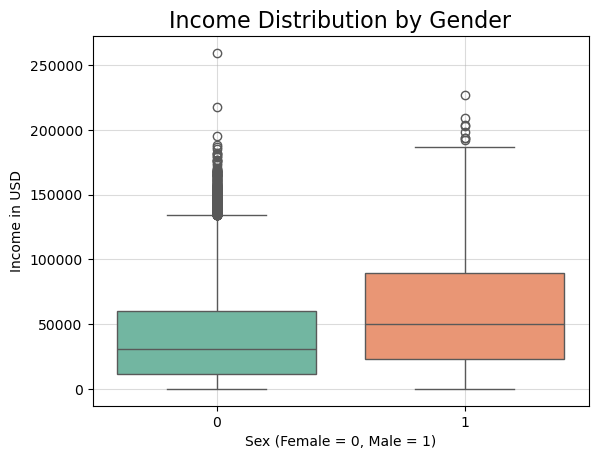

In [34]:

#box plot for men and women in terms of income
census_data = pd.read_csv('data/census_data.csv')

male_female_income_data = census_data[["sex", "income"]]
boxplot = sns.boxplot(data = male_female_income_data, x = 'sex', y = 'income', hue = 'sex', palette = 'Set2', legend = False)
for patch in boxplot.artists:
    patch.set_facecolor('blue')  # Set box color
    patch.set_alpha(0.5)
plt.xlabel('Sex (Female = 0, Male = 1)')
plt.ylabel('Income in USD')
# plt.yscale('log')
plt.title('Income Distribution by Gender', fontsize=16)
plt.grid(alpha = 0.45)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.2</b></div>

Let's investigate a few questions about education and income:
- Is there a relationship between income and education level? 

- Is this trend similar across both genders in the dataset? 

- Is it possible to consider education level as an ordinal variable? For instance, consider whether retaining the numerical ordering in the dataset might be preferable to education level as a categorical variable lacking order. 

**Yes, there is a relationship between income and education level. It is clear that as one's education level increases, one's income (and income potential) increases as well. This trend is similar across both genders in the dataset.**

**We can consider education level as an ordinal variable if we consider it in terms of income, which is the purpose of this dataset. We have seen a clear relationship between education level and income, and thus, the ordering of education variables (0 being the lowest and 6 being the highest) makes sense if we look at it in terms of income.** 


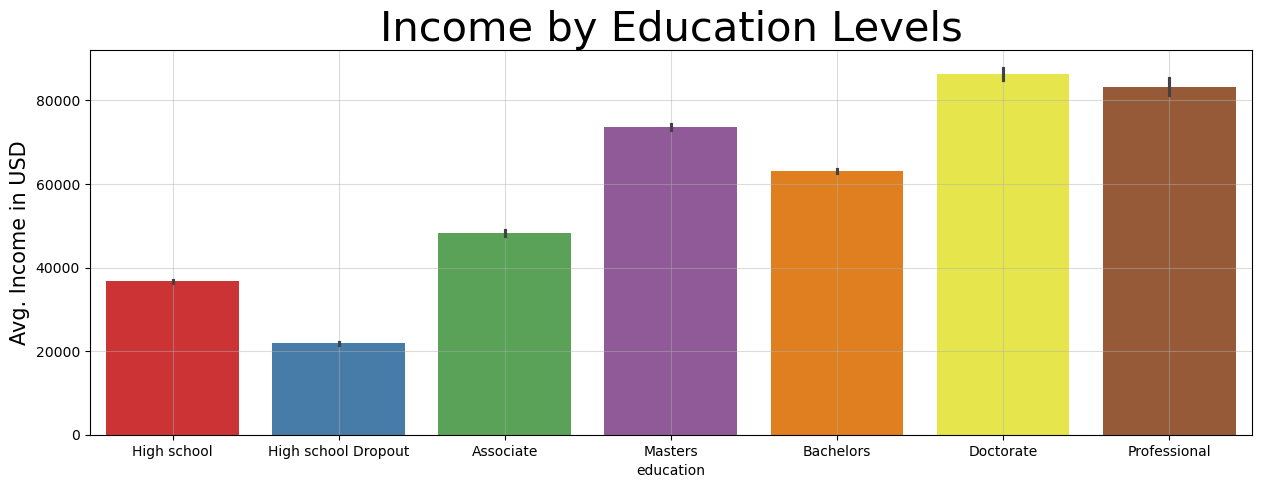

In [35]:
# your code here

income_education_data = census_data[["education", "income", "sex"]]

education = {'High school Dropout': 0, 'High school': 1, 'Associate': 2, 'Bachelors': 
3,'Masters': 4,'Professional': 5, 'Doctorate': 6}

for key, value in education.items():
    if value in income_education_data['education']:
        income_education_data = income_education_data.replace(value, key)

plt.figure(figsize=(15, 5))
sns.barplot(data = income_education_data, x = 'education', y = 'income', 
            palette = 'Set1', hue = 'education', legend = False)
plt.ylabel("Avg. Income in USD", fontsize = 15)
plt.title("Income by Education Levels", fontsize = 30)
plt.grid(alpha = 0.45)

#Second plot color diff for men and women.

/var/folders/yq/5p00hdm16xsb4kbmhwk9rcx80000gn/T/ipykernel_31619/1662244491.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_education_data['sex'] = income_education_data['sex'].map(sex_dict)


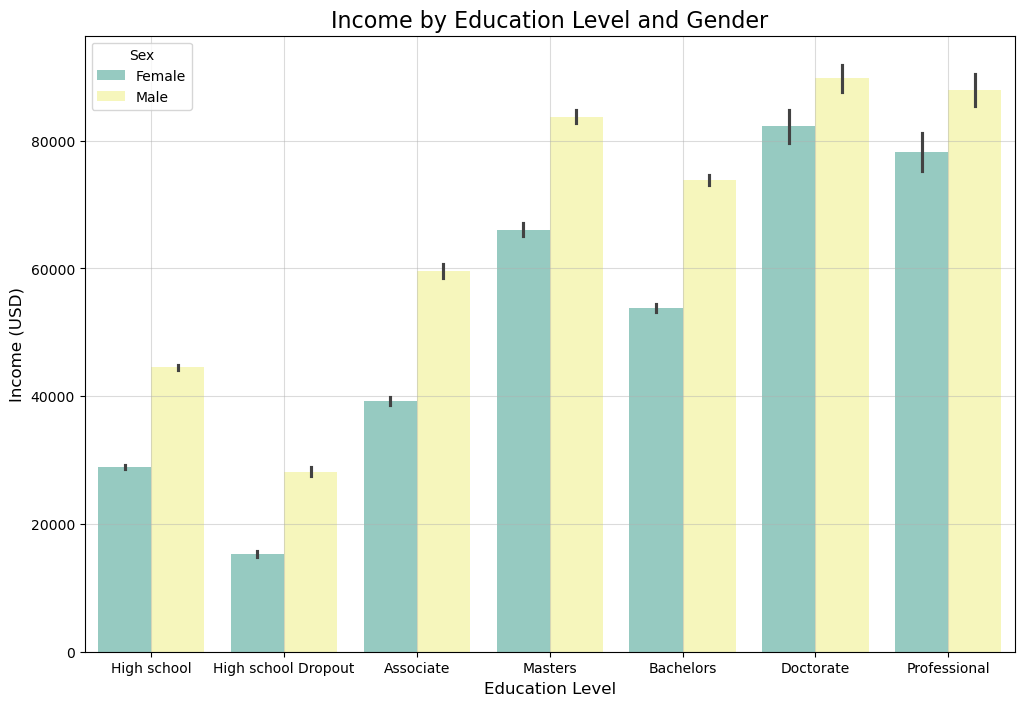

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

income_education_data = census_data[["education", "income", "sex"]]  

sex_dict = {0: 'Female', 1: 'Male'}

income_education_data['sex'] = income_education_data['sex'].map(sex_dict)
for key, value in education.items():
    if value in income_education_data['education']:
        income_education_data = income_education_data.replace(value, key)

income_education_data.head()

plt.figure(figsize=(12, 8))

sns.barplot(
    data=income_education_data,
    x='education',
    y='income',
    hue='sex',      # differentiate the bars by gender
    palette='Set3', 
    dodge=True      
)

plt.title('Income by Education Level and Gender', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Income (USD)', fontsize=12)


plt.legend(title = 'Sex')
plt.grid(alpha = 0.45)



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.3</b></div>

Is there a clear trend between age and income?

**There definitely is a rise in income as one gets older to a certain extent. I would say the peak income years are between 35 and 58. After this plateau, income levels drop again. So yes, there is a clear trend between age and income; a sort of bell curve if you will.**

/var/folders/yq/5p00hdm16xsb4kbmhwk9rcx80000gn/T/ipykernel_31619/2123530435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_age_data['age'] = pd.cut(income_age_data['age'], bins = range(0, 101,10), right = False, labels = [f'{i}-{i+9}' for i in range(0, 100,10)])


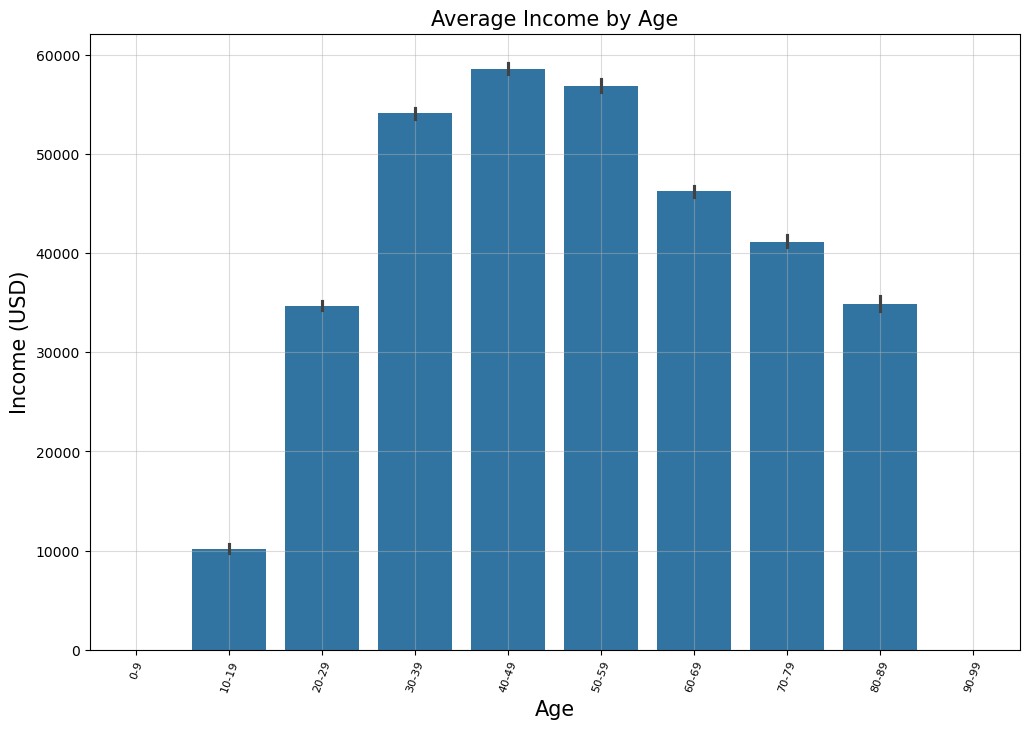

In [38]:
income_age_data = census_data[["income", "age"]]
# plt.scatter(x = income_age_data['age'], y = income_age_data['income'])
plt.figure(figsize=(12, 8))

income_age_data['age'] = pd.cut(income_age_data['age'], bins = range(0, 101,10), right = False, labels = [f'{i}-{i+9}' for i in range(0, 100,10)])

#I can also do a lineplot
sns.barplot(
    data=income_age_data,
    x='age',
    y='income',       
    dodge=True      
)
plt.xticks(rotation = 70, fontsize = 8)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Income (USD)', fontsize = 15)
plt.title('Average Income by Age', fontsize = 15)
plt.grid(alpha=0.45)
# I'm thinking I have to group the ages by 10s. 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81-90, 91-100

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.4</b></div>

Do any of the quantitative attributes show a clear relationship with income? If so, are these relationships linear or non-linear?

**There seems to be a clear relationship between weeks worked and income levels. It is clear to see as the number of weeks worked increases, usually average income increases as well. The lowest amount of weeks worked results in the lowest average income, and the highest amount of weeks worked results in the highest amount of income. So there seems to be a positive correlation and thus positive linear relationship between X = amount of weeks worked and Y = income.**

**The relationship between hours per weeks and income is not so clear. The income levels stay relatively similar from 0-40 hours per week of work, and then all of a sudden there is a big positive spike for hours past 40. There seems to be a creschendo after this 40 hours per week mark of increasing income values along with increasing hours per weeks, however this is not necessarily the case. For example, the most hours per week worked results in a middle of the pack average income, where if there was a clear positive relationship between the two variables, we would expect that this amount of hours per week would result in the highest income earned.** 

**From the correlation matrix, we can see that the other quantitiative variable, hourly_pay, is not correlated at all with income, the entry for the income column and hourly_pay row is 0 on the correlation scale. So there is no need to plot this relationship.** 

<Axes: >

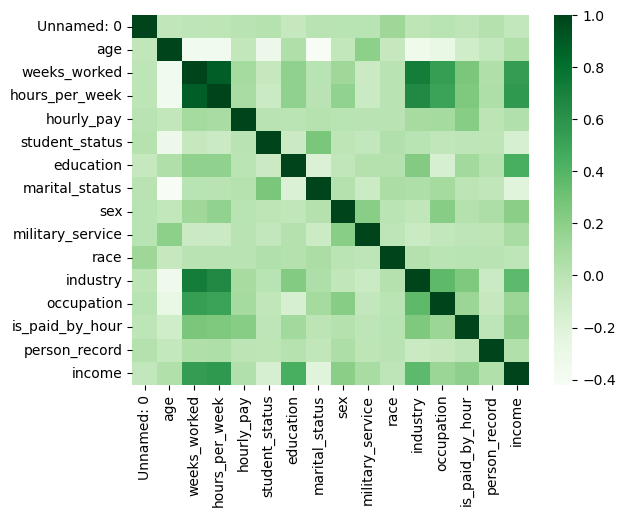

In [39]:
sns.heatmap(census_data.corr(), cmap = "Greens")

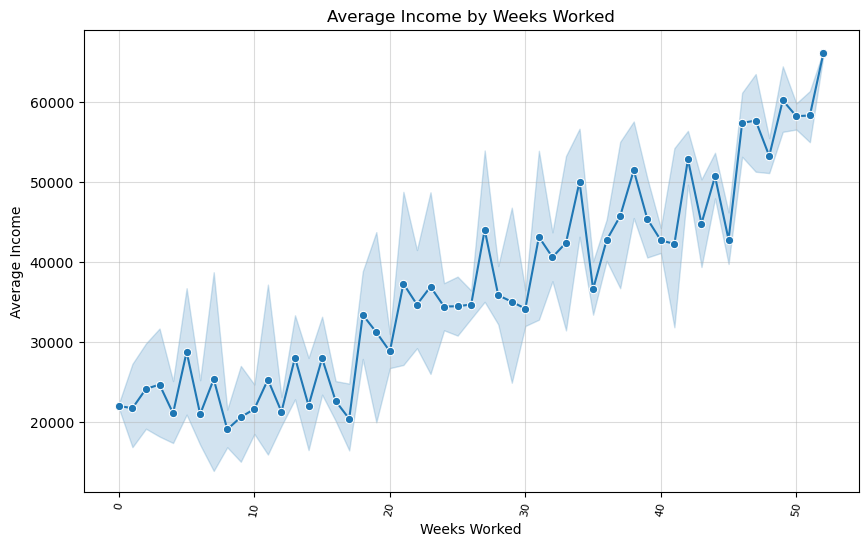

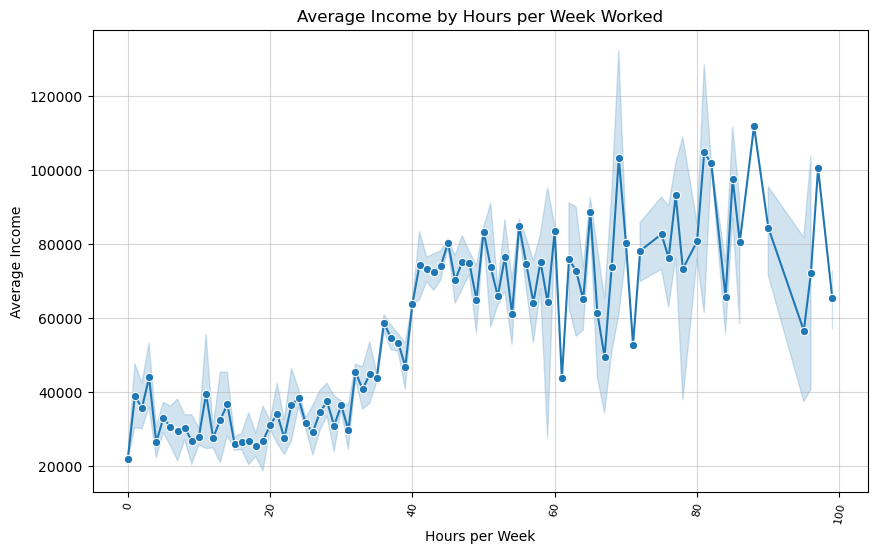

In [40]:
# your code here
#Hours per week, weeks worked, and hourly pay are the only other quantitative attributes
#weeks_worked
#hours_per_week
# df.groupby('gender').mean('age')

#CONVERT TO LINEPLOT

plt.figure(figsize = (10,6))
sns.lineplot(
    data=census_data, 
    x='weeks_worked', 
    y='income',
    marker='o' 
)

plt.title('Average Income by Weeks Worked')
plt.xlabel('Weeks Worked')
plt.ylabel('Average Income')
plt.xticks(rotation=80, fontsize=8)
plt.grid(alpha = 0.45)  


#CONVERT TO LINEPLOT
plt.figure(figsize = (10,6))
sns.lineplot(
    data=census_data,
    x='hours_per_week',
    y='income',
    marker = 'o',
    )    
plt.title('Average Income by Hours per Week Worked')
plt.xlabel('Hours per Week')
plt.ylabel('Average Income')
plt.xticks(rotation=80, fontsize = 8)
plt.grid(alpha = 0.5)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.5</b></div>

What is the average effect of the `military_service` variable on income?

**So we can see that the average effect of military service on income is an extra $12165.718. So you get a higher income if you served in the military.**

In [41]:
# your code here
income_military_data = census_data[["military_service", "income"]]  

#calculuate difference in income level between veteran and not veteran
avg_military_income = income_military_data.groupby('military_service').mean('income')
avg_military_income.head()
military_income_residual = avg_military_income.iloc[1] - avg_military_income.iloc[0]
print("The difference in income between veterans and non-veterans is", military_income_residual)




The difference in income between veterans and non-veterans is income    12165.718
dtype: float64


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.6</b></div>

Propose a question of your own that you would like to explore in the data. Create a visualization to help you answer this question and provide an interpretation of your findings.

**My question is "do certain occupations tend to be paid more on average than others?"**

I created boxplots to visualize the relationship between occupation and income levels. It is clear to see that the management/business occupation has the highest average salary and also the highest income level in the dataset. Then, professional occupation comes in at second with the second highest average salary, and then sales has the third highest average salary. 

In terms of income range, professional occupation has the greatest range of income levels out of any other occupation, followed by management/business and then by sales. So while these occupations tend to be paid more on average, they still have a great range of income levels, and being in one of these occupations does not necessarily imply you will have a higher than average income. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Admin Support'),
  Text(2, 0, 'Farming'),
  Text(3, 0, 'Service'),
  Text(4, 0, 'Transportation'),
  Text(5, 0, 'Construction'),
  Text(6, 0, 'Professional'),
  Text(7, 0, 'Mgmt/Business'),
  Text(8, 0, 'Sales '),
  Text(9, 0, 'Maintanence'),
  Text(10, 0, 'Production'),
  Text(11, 0, 'Armed Forces')])

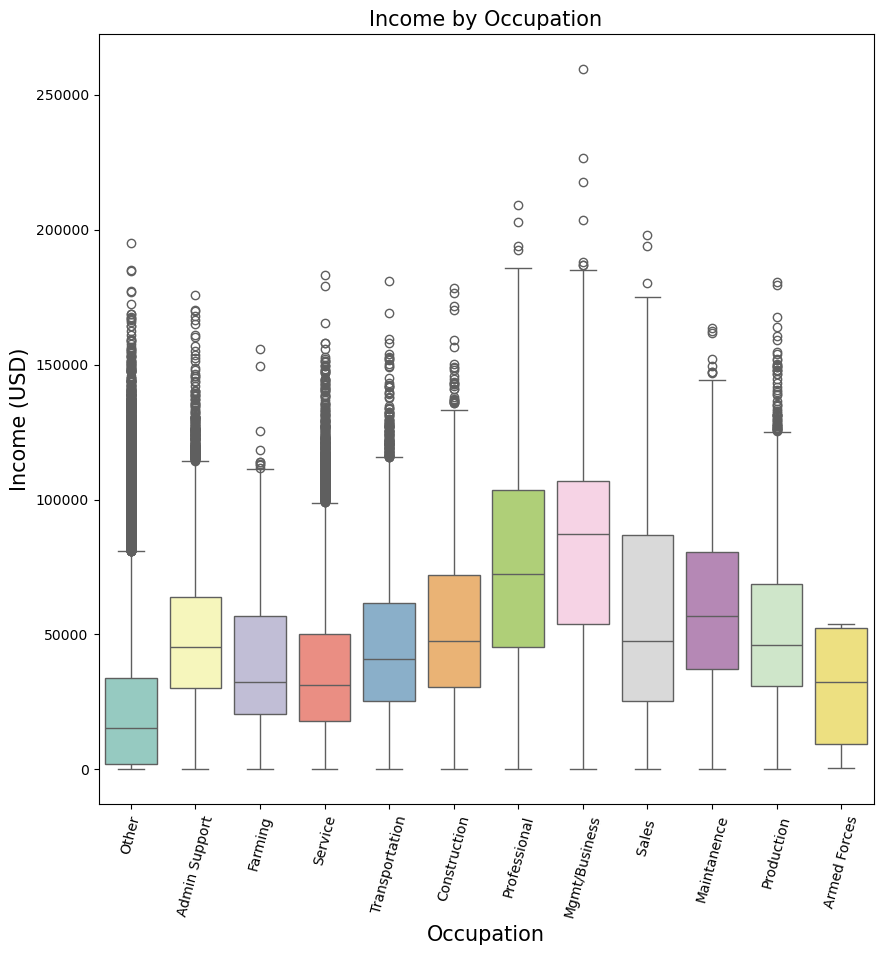

In [42]:
occupation_dict = {'Other': 0, 'Mgmt/Business': 1, 
                                   'Professional': 2, 
                                   'Service': 3, 'Sales ': 4,
                                   'Admin Support': 5,
                                   'Farming': 6, 
'Construction': 7, 'Maintanence': 8, 
'Production': 9, 'Transportation': 10, 
'Armed Forces': 11}

income_occupation_data = census_data[["occupation", "income"]]

for key, value in occupation_dict.items():
    if value in income_occupation_data['occupation']:
        income_occupation_data = income_occupation_data.replace(value, key)

# income_occupation_data.head()
plt.figure(figsize=(10, 10))

sns.boxplot(
    data=income_occupation_data,
    x='occupation',
    y='income', 
    hue = 'occupation',
    palette='Set3',
    dodge=False,
    legend = 'auto'
)
plt.xlabel("Occupation", fontsize = 15)
plt.ylabel("Income (USD)", fontsize = 15)
plt.title("Income by Occupation", fontsize = 15)
plt.xticks(rotation = 75)
        


# income_education_data['sex'] = income_education_data['sex'].map(sex_dict)
# for key, value in education.items():
#     if value in income_education_data['education']:
#         income_education_data = income_education_data.replace(value, key)

# income_education_data.head()




<!-- END QUESTION -->

<a id="part5questions"></a>

## <div class='exercise'><b>Question 5:  Calculate the Gini coefficient [10 pts]</b></div>

[Return to contents](#contents)


**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, you can [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

<div class='exercise'><b>Q5.1</b></div>

Based on the above formula, calculate and report the Gini coefficient for the income of those people in the the provided ASEC dataset. Store the result in `gini_coef`.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 5.1.

In [43]:
# your code here

#rank income values in ascending order. x is our income variable. n is the number of income values.

income_data = census_data[["income"]]
income_data = income_data.sort_values(by = 'income', ascending = True)
indices = np.array(income_data.reset_index().index) + 1
income_list = income_data.income.values #have to append these dataframe values to a list just to have simpler time with the gini function
# income_list
gini_coef = np.sum((2*indices - len(indices) - 1)*income_list) / (len(indices)*np.sum(income_list))
#multiplying numpy arrays, numpy does the multiplacations element wise, so it makes it easy to do summation notation
#do operation inside sum with the arrays, and then just np.sum() the result

In [44]:
# Print resulting Gini coefficient
print(f"The Gini Index for this dataset is {gini_coef:.3f}")

The Gini Index for this dataset is 0.448


In [45]:
grader.check("q5.1")

q5.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.2</b></div>

According to the [World Bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is the Slovak Republic, ranked 162nd at $0.232$. The United States is ranked 46th on the list and has a Gini index of $0.415$.

- How well does your calculated Gini coefficient for this simulated dataset match the world bank estimate?

- Might the self-report nature of the data, preprocessing steps, or simulation (i.e., sampling) procedure have affected your results? If so, how?

**Note:** The World Bank estimate website uses a [0,100] range for the Gini Index. Above we have converted this to a [0,1] range.

The Gini coefficient for this simulated dataset would be ranked 30th in the World Bank estimate. This is relatively close to the United States' value in the Gini coefficient, so I would say my estimate matches the World Bank estimate reasonably well. 


Sure, my results may have been affected by the above suggestions. For self-reporting, people can lie about their income. External pressures may make them lowball or highball their income values, so there may be untruthful data. 

Yes, some steps affected my results for the preprocessing steps. For instance, the distribution of income values in the dataset was altered. Initially, the distribution of income buckets (0-41) was bimodal, with many people reporting 0 income and many people reporting 100k+ income. When the team was sampling the new dataset, they took this distribution. They applied an exponential distribution to that final 100k+ bucket to simulate what they thought was a more accurate description of earned income in a society. There should be a right skew because there will be a few outliers with great incomes.  Also, some categorical variables had their unique values reduced. However, I would argue that this step in the preprocessing does not affect our answer for our Gini coefficient. For instance, someone's race may not be truthful in the dataset; however, their income level remains the same. Therefore, the Gini coefficient summation for that specific index will be the same regardless of whether that person was reported as race x or y. 

Yes, the sampling procedure could have affected my result. I may have gotten two more 20,000 incomes than 900,000
incomes, or two more 900,000 incomes than 20,000 incomes. That could have changed my Gini coefficient value to a minor degree. However, sampling is done to represent the original data to the highest degree, so this change would not be grave.  




<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<a id="part6questions"></a>

## <div class='exercise'><b>Question 6:  Critiquing the simulated data [10 pts]</b></div>

[Return to contents](#contents)

Take a look at both the [data dictionary for the original dataset](https://www2.census.gov/programs-surveys/cps/datasets/2024/march/asec2024_ddl_pub_full.pdf) and the notebook used to create the simplified simulation, `data/preprocessing.ipynb`. 

What might you have done differently were you to write your own preprocessing code?
A nonexhaustive list of a few things to consider would be:
- Are there important features you think should have been included that were not? 
- Do you agree with the methods used to reduce the number of unique categorical values?
- Might there be a better way to simulate a continuous response from the discrete income brackets in the original data?

**Note:** We used the record type 'person' data from the ASEC rather than 'household' or 'family.' All three record types are represented in the data dictionary.

> **Note**: The rubric below is provided for transparency. Please ensure your responses are genuine and thoughtful, rather than simply attempting to "fit" the rubric.
---
<details>
<summary><b>Click to view the Q6 Critique Rubric</b></summary>
    
### Q6 Critique Rubric:

**Total Points: 10**

#### 1. Relevance of Comments (4 points):
- **4 points**: The critique directly addresses specific sections or steps in the preprocessing notebook, demonstrating a thorough understanding of the content.
- **3 points**: The critique references multiple sections of the notebook with some specificity.
- **2 points**: The critique generally addresses the notebook but may lack specific references to steps or sections.
- **1 point**: The critique provides only a cursory overview without specific details.
- **0 points**: The critique does not address the preprocessing notebook.

#### 2. Depth of Analysis (4 points):
- **4 points**: The student provides deep insights, identifies potential pitfalls, or suggests meaningful improvements for multiple sections of the notebook.
- **3 points**: The student provides valuable feedback for one section or multiple but less detailed feedback for several sections.
- **2 points**: The analysis is somewhat detailed but may lack depth or actionable feedback.
- **1 point**: The feedback is generic or surface-level.
- **0 points**: No meaningful analysis provided.

#### 3. Clarity and Organization (2 points):
- **2 points**: The critique is well-organized, clear, and easy to follow.
- **1 point**: The critique is somewhat organized but may have unclear sections.
- **0 points**: The critique is disorganized or difficult to understand.

---

Remember to provide specific examples or suggestions whenever possible. General statements without backing evidence or examples will not be as valuable as those with clear references and reasoning.

</details>


**Relevance of Comments (4 points):
4 points: The critique directly addresses specific sections or steps in the preprocessing notebook, demonstrating a thorough understanding of the content.**

**4 points: The student provides deep insights, identifies potential pitfalls, or suggests meaningful improvements for multiple sections of the notebook.**

**2 points: The critique is well-organized, clear, and easy to follow.**

I would have done a few different actions if I were to write my own preprocessing code. Starting off with some **Qualitative observations**: 

**1.** I would have included the geography (GEDIV), the current healthcare (NOW_HCOV), and the household stock/mutual fund (HDIV_YN) features in the dataset. In general, I believe all of these variables would show interesting trends in income in the United States. They cover some serious concerns we have in our country: that poorer individuals can not afford healthcare. Poorer individuals do not purchase stocks/mutual funds, and wealthy individuals do. Certain regions in the United States have higher income levels and are thus more developed than others. Including these variables in the dataset and visualizing the trends would be fruitful and allow for deep discussion into income segregation in the United States beyond surface-level observations. 

**2.** I'm afraid I have to disagree with the method of preprocessing the race feature of the dataset. As a multiracial person, I believe every aspect of my identity is vital in shaping who I am, as it is to other people. There is a popular trend and relationship between race and income in the United States. The United States has struggled with income inequality by race for many decades. The United States is also a multi-racial country. I believe reducing the number of races present in the census data is doing a disservice to studying this relationship between race and income and also the United States itself. There may be some severe differences in income between Asian/Hispanic/Black mixed people and Asian/Hispanic/White mixed people; however, if both groups are listed as Asian/Hispanic (Asian-HP) in the processed data, then those trends and observations are erased. The United States will keep getting increasingly diverse, so there may be more and more new income inequalities between these races. However, if we fail to recognize this increasing diversity and try to stuff people into specific race categories, then we do not see these trends, and we can not help our country prosper. A CS109a dataset will not solve the United States' race problems, so this is not a big deal. However, I am more concerned with the principle, and it is a great lesson to learn for my future potential as a data scientist.


**Quantitative observations:** 
**1.** I agree with most of the preprocessing steps taken. I agree with the sampling method process of using an exponential distribution for the last income bucket, as we want filthy rich people in the tail of the income distribution. Inherently, this makes sense, as in any society, you will most likely encounter a few outliers that have extraordinary income levels compared to the rest of the population. I completely agree with the interval method for different income brackets. They are broken up into these discrete, 5000 dollar increments, so people in these buckets have pretty similar circumstances. 

One potential pitfall of this sampling, however, is using an exponential distribution to model that last 100k+ bucket. Predictions at this upper end of the range may be unreliable. For example, if you have person A with an income of 101k, and we use this sampling method to reproduce them in our new dataset, they may now have an income of 500k because we used this exponential distribution technique. There is no bound on their income in this new dataset. I honestly do not have a fabulous solution to this problem. This made me realize that there may not be a one-size-fits-all approach to data science. We may have to sacrifice some errors for the greater good of the entire project. This method of sampling from the TF team is a good one, and maybe at the end of the day, that's all that matters. 
















The aspects of the assignment I found most challenging were the quantitative variable graphs for question 4. First, figuring out which type of graph would best explain the trends was tricky. I initially did a bar plot, but then the values on the x-axis got super tight and meshed. The bars were also very skinny because there were so many x values. So I spent half an hour trying to fix this and make the graphs look nice, and then I went to office hours, and the simple solution was to create a line plot. So, while I felt I wasted time, I was glad I got a nice-looking plot! It is helpful to have this in the toolkit if I have many x-axis values and want to plot a frequency-type graph. 























<!-- END QUESTION -->

<div class="alert alert-info" style="color: #4a4a4a; background-color: #fbe8ff; border-color: #eed4db; border-width: 1px; border-radius: 3px; padding: 10px;">

**Wrap-up**

* Please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation. This is also a good place to ask any remaining questions you may have.

* How many hours did you spend working on this assignment? Store this as an int or float in `hours_spent_on_hw`. If you worked on the project in a group, report the *average* time spent per person.

</div>

In [46]:
hours_spent_on_hw = 10

In [108]:
grader.check("wrapup")

wrapup results: All test cases passed!

In [109]:
notebook_end = time.time()
print(f"It took {(notebook_end - notebook_start)/60:.2f} minutes for this notebook to run")

It took 2953.74 minutes for this notebook to run


🌈 **This concludes HW2. Thank you!**

[Return to contents](#contents)